In [4]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [5]:
patients = Table.read_table('breast-cancer.csv')
patients.show(5)

ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
1000025,5,1,1,1,2,1,3,1,1,0
1002945,5,4,4,5,7,10,3,2,1,0
1015425,3,1,1,1,2,2,3,1,1,0
1016277,6,8,8,1,3,4,3,7,1,0
1017023,4,1,1,3,2,1,3,1,1,0


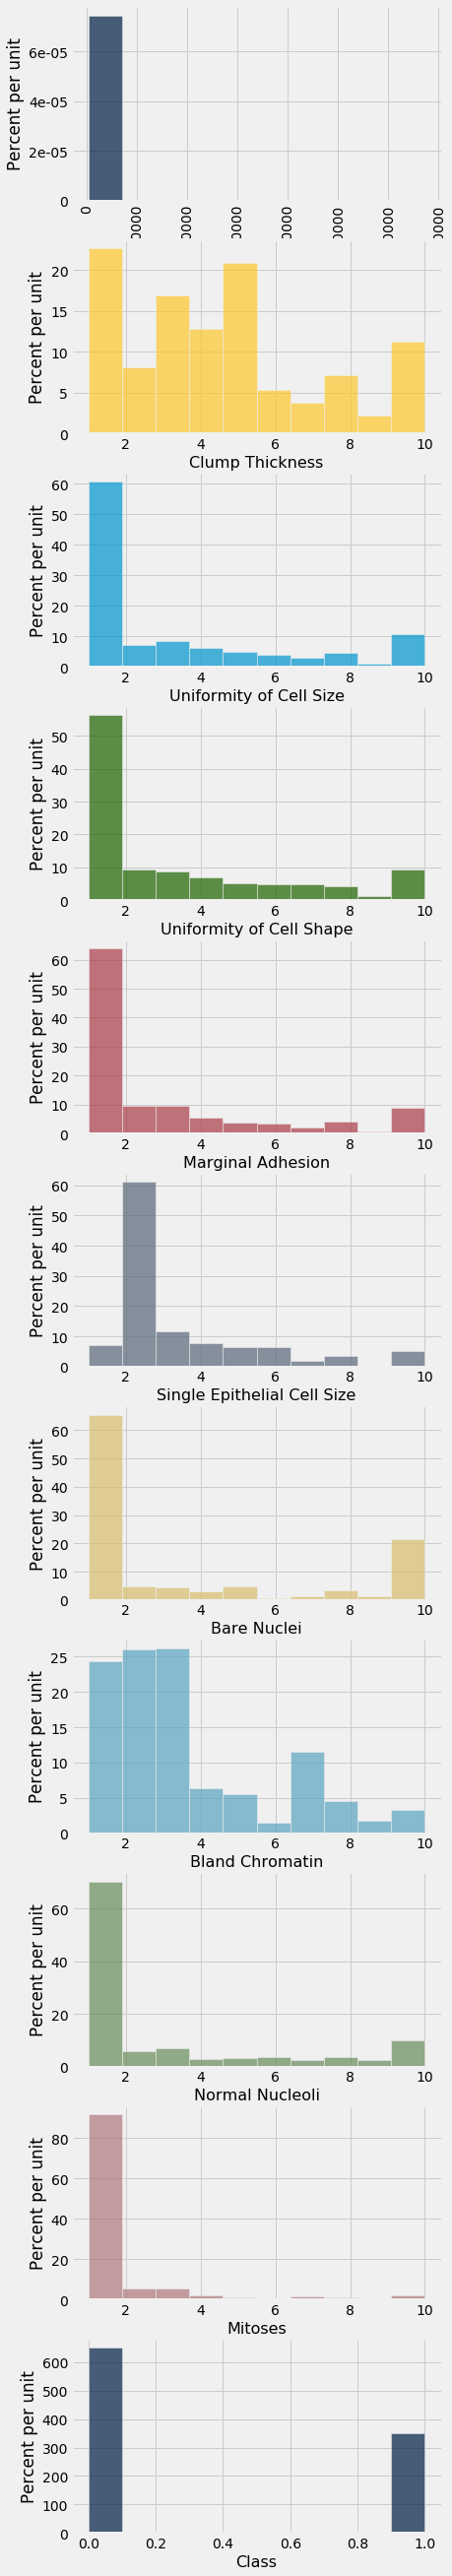

In [6]:
patients.hist(overlay=False)

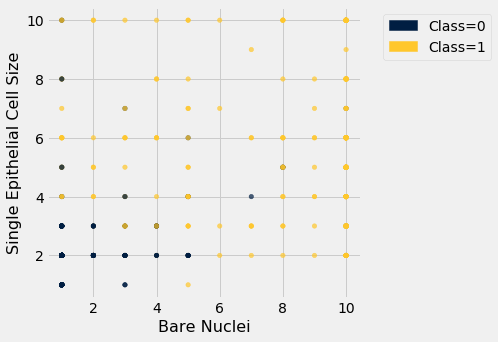

In [7]:
patients.scatter(6,5,colors='Class')

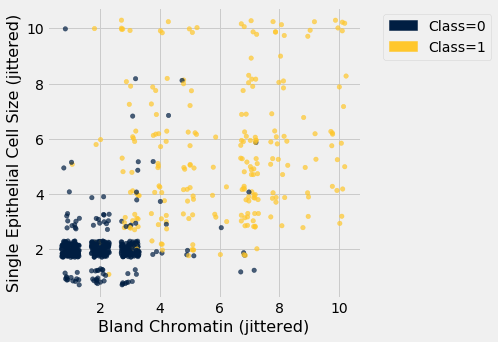

In [8]:
def jitter_column(a):
    return a + np.random.uniform(-0.3, 0.3, size=len(a))

jittered = Table().with_columns(
    'Bland Chromatin (jittered)',
    jitter_column(patients.column('Bland Chromatin')),
    'Single Epithelial Cell Size (jittered)',
    jitter_column(patients.column('Single Epithelial Cell Size')),
    'Class',
    patients.column('Class')
)

jittered.scatter(0,1,colors='Class')

(back to slides)

# Distance

In [9]:
def distance(pt1, pt2):
    return np.sqrt(sum((pt1 - pt2) ** 2))

def row_distance(row1, row2):
    return distance(np.array(row1), np.array(row2))

In [10]:
row_distance([0,0], [3,4])

5.0

In [11]:
row_distance([10,10], [13,14])

5.0

In [12]:
row_distance(patients.row(1),patients.row(2))

12480.005128204075

# Classification Procedure

In [13]:
def distances(training, example):
    dists = []
    attributes = training.drop('Class')
    for row in attributes.rows:
        dists.append(row_distance(row,example))
    return training.with_column('Distance', dists)

def closest(training, example, k):
    return distances(training,example).sort('Distance').take(k)

def majority_class(top_k):
    return top_k.group('Class').sort('count',descending=True).column(0).item(0)

def classify(training,example,k):
    return majority_class(closest(training,example,k))

In [27]:
k = 1
trn = patients.exclude(1)
ex = patients.drop('Class').row(1)
classify(trn,ex,k)

0

In [28]:
patients.row(1)[-1]

0

# Evaluation

In [20]:
patients.num_rows

683

In [29]:
shuffled = patients.sample(with_replacement=False)
trainset = shuffled.take(range(342)).drop('ID')
testset = shuffled.take(range(342,683)).drop('ID')

In [30]:
def evaluate_accuracy(training,test,k):
    test_attributes = test.drop('Class')
    numcorrect = 0
    for i in range(test.num_rows):
        c = classify(training, test_attributes.row(i),k)
        if c == test.column('Class').item(i):
            numcorrect += 1
    return numcorrect / test.num_rows

In [31]:
evaluate_accuracy(trainset,testset,1)

0.9501466275659824

In [34]:
evaluate_accuracy(trainset,testset,3)

0.9530791788856305

In [33]:
evaluate_accuracy(trainset,testset,10)

0.9413489736070382